In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [8]:
import matplotlib.pyplot as plt


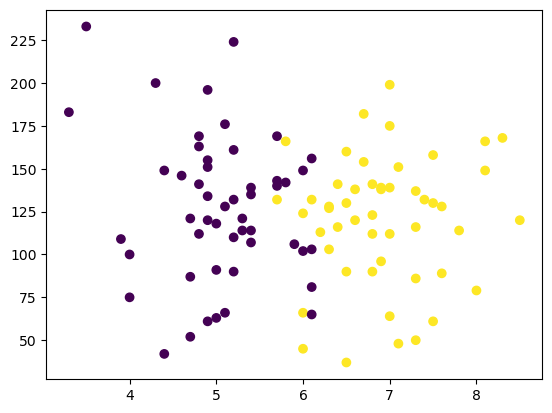

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y.shape

(100,)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [16]:
X_train

,cgpa,iq
77,7.3,50.0
41,5.4,114.0
88,4.4,149.0
66,6.9,96.0
81,5.4,107.0
...,...,...
45,6.0,66.0
15,5.1,176.0
34,4.8,163.0
90,7.3,86.0


In [17]:
y_train

77    1
41    0
88    0
66    1
81    0
     ..
45    1
15    0
34    0
90    1
18    0
Name: placement, Length: 90, dtype: int64

In [18]:
X_test

,cgpa,iq
83,7.5,130.0
13,6.4,116.0
99,6.2,113.0
86,5.1,128.0
74,6.7,154.0
65,8.1,166.0
61,7.3,137.0
1,5.9,106.0
94,4.7,52.0
80,4.9,196.0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[ 1.17835981, -1.82157158],
       [-0.49106461, -0.22214288],
       [-1.36970904,  0.6525447 ],
       [ 0.82690204, -0.6719822 ],
       [-0.49106461, -0.39708039],
       [ 1.3540887 , -1.54666977],
       [ 0.03612205,  0.02776786],
       [-1.01825127,  0.45261611],
       [ 0.47544427,  0.1777143 ],
       [ 0.73903759,  0.45261611],
       [ 0.73903759, -0.27212502],
       [-0.57892905, -0.04720536],
       [ 0.12398649, -1.0468483 ],
       [-0.22747128,  1.15236616],
       [-0.13960684,  1.07739294],
       [ 0.47544427, -2.14645553],
       [ 0.56330871, -0.07219643],
       [ 1.88127536,  0.6525447 ],
       [ 1.26622425,  0.22769645],
       [ 0.82690204,  0.37764289],
       [-1.01825127,  1.15236616],
       [ 0.38757982,  0.45261611],
       [-0.22747128,  0.22769645],
       [-0.93038683, -1.54666977],
       [-0.49106461,  0.30266967],
       [ 0.91476648,  1.90209837],
       [-0.57892905, -0.22214288],
       [-0.84252238, -1.49668762],
       [-0.6667935 ,

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[ 1.3540887 ,  0.1777143 ],
       [ 0.38757982, -0.17216073],
       [ 0.21185094, -0.24713395],
       [-0.75465794,  0.12773215],
       [ 0.65117315,  0.77750006],
       [ 1.88127536,  1.07739294],
       [ 1.17835981,  0.35265181],
       [-0.05174239, -0.42207146],
       [-1.10611571, -1.77158943],
       [-0.93038683,  1.82712515]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
y_test

83    1
13    1
99    1
86    0
74    1
65    1
61    1
1     0
94    0
80    0
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

1.0

In [35]:
!pip install mlxtend --upgrade --no-deps

                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 1.4 MB/s eta 0:00:01
     --                                       0.1/1.4 MB 660.6 kB/s eta 0:00:02
     ----                                     0.2/1.4 MB 1.1 MB/s eta 0:00:02
     ---------                                0.3/1.4 MB 1.6 MB/s eta 0:00:01
     ------------                             0.4/1.4 MB 1.8 MB/s eta 0:00:01
     --------------                           0.5/1.4 MB 1.7 MB/s eta 0:00:01
     ------------------------                 0.8/1.4 MB 2.5 MB/s eta 0:00:01
     --------------------------               0.9/1.4 MB 2.4 MB/s eta 0:00:01
     ----------------------------             1.0/1.4 MB 2.4 MB/s eta 0:00:01
     ------------------------------           1.0/1.4 MB 2.2 MB/s eta 0:00:01
     ---------------------------------------  1.4/1.4 MB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 2.5 MB/s eta

In [36]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

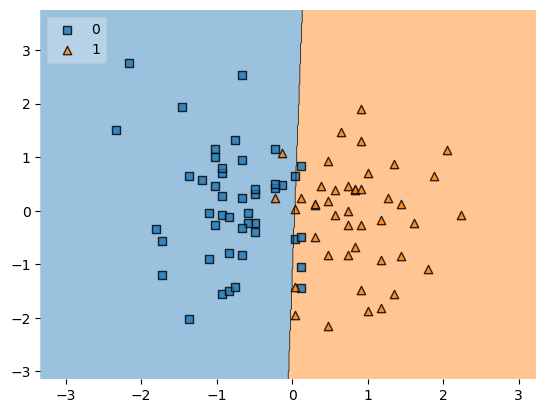

In [37]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [38]:
import pickle

In [40]:
pickle.dump(clf,open('model.pkl','wb'))